In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flux_file = r'/scratch/project_2000908/nousu/mNFI_to_NEP/FINAL_LAYERS/scaled_carbon_fluxes_2.nc'
mask_file = r'/scratch/project_2000908/nousu/mNFI_to_NEP/FINAL_LAYERS/regional_mask.nc'

In [3]:
mask = xr.open_dataset(mask_file)
flux = xr.open_dataset(flux_file)

In [4]:
# Define masks and flux variable names
mask_keys = ['AF_mask', 'SF_mask', 'NF_mask']
flux_keys = ['NEP', 'GPP', 'RECO', 'BAL']

# Initialize a dictionary to hold masked variables
masked_vars = {}

# Multiply each flux variable with each mask and store the result
for flux_key in flux_keys:
    for mask_key in mask_keys:
        new_var_name = f"{flux_key}_{mask_key.split('_')[0]}"  # e.g., NEP_AF
        masked_vars[new_var_name] = flux[flux_key] * mask[mask_key]

# Create a new dataset with the same coords/dims as flux
flux_masked = xr.Dataset(masked_vars, coords=flux.coords)

# Optional: add units to the variables
for var in flux_masked.data_vars:
    flux_masked[var].attrs['units'] = 'g C m-2 a-1'

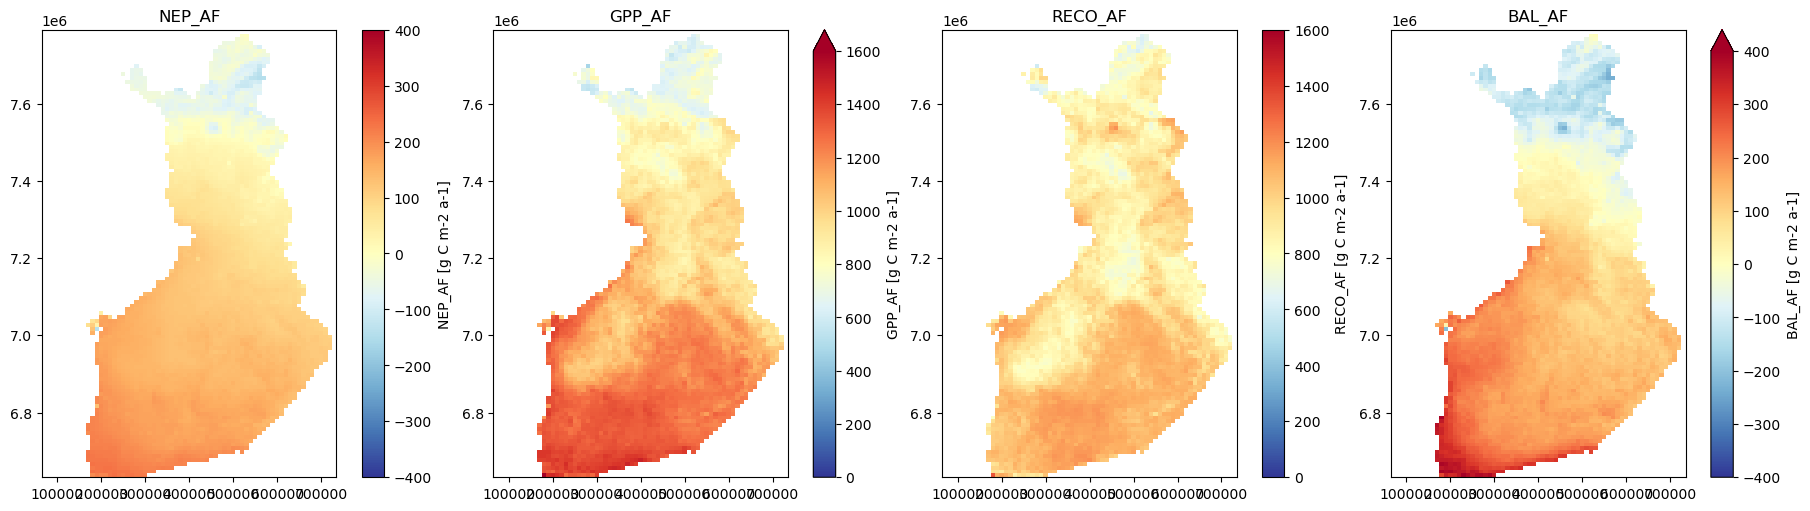

In [10]:
plot_only = 'AF'  # choose 'AF', 'SF', or 'NF'
fig_file = f'/scratch/project_2000908/nousu/mNFI_to_NEP/FIGS/scaled_fluxes_2_{plot_only}.png'

# Select variables that end with the chosen region suffix
vars_to_plot = [var for var in flux_masked.data_vars if var.endswith(f"_{plot_only}")]

# Sort variables so the order is always NEP, GPP, RECO, BAL (if present)
order = ['NEP', 'GPP', 'RECO', 'BAL']
vars_to_plot_sorted = sorted(vars_to_plot, key=lambda v: order.index(v.split('_')[0]))

# Create figure with one subplot per variable (4 columns)
nvars = len(vars_to_plot_sorted)
fig, axes = plt.subplots(1, nvars, figsize=(18, 5), constrained_layout=True)

if nvars == 1:
    axes = [axes]

# Plot each variable with appropriate vmin/vmax for NEP and BAL
for ax, var_name in zip(axes, vars_to_plot_sorted):
    plot_kwargs = {'ax': ax, 'cmap': 'RdYlBu_r'}
    if any(var_name.startswith(v) for v in ['NEP', 'BAL']):
        plot_kwargs.update({'vmin': -400, 'vmax': 400})
    elif any(var_name.startswith(v) for v in ['GPP', 'RECO']):
        plot_kwargs.update({'vmin': 0, 'vmax': 1600})    
        
    flux_masked[var_name].plot(**plot_kwargs)
    ax.set_title(var_name)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Save to file
plt.savefig(fig_file, dpi=300, bbox_inches='tight')
plt.show()

In [27]:
print('All Finland')
print('NEP:', flux_masked['NEP_AF'].mean().values)
print('BAL:', flux_masked['BAL_AF'].mean().values)
#print('')
print('Southern Finland')
print('NEP:', flux_masked['NEP_SF'].mean().values)
print('BAL:', flux_masked['BAL_SF'].mean().values)
#print('')
print('Northern Finland')
print('NEP:', flux_masked['NEP_NF'].mean().values)
print('BAL:', flux_masked['BAL_NF'].mean().values)

All Finland
NEP: 100.00142198223257
BAL: 100.21883941077425
Southern Finland
NEP: 155.61900234931932
BAL: 180.0928489360776
Northern Finland
NEP: 34.05145237466313
BAL: 5.506188017802635
